In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial import distance

In [2]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,['Turkey'],['Turkey'],77,2009,0.485,6
1,30574690,"['United States', 'France']","['United States', 'United States', 'United Sta...",83,2009,0.703,9
2,30574691,['Russia'],['Russia'],83,2009,0.312,4
3,30585095,"['Spain', 'Spain']","['Spain', 'Spain', 'Spain', 'Spain', 'Spain', ...",89,2009,0.137,1
4,30585097,"['Germany', 'Spain']",['Spain'],89,2009,0.410,3


In [4]:
pubs_author_funder['funder_country']=pubs_author_funder['funder_country'].fillna(0)

In [5]:
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if x!=0 else 0)


In [6]:
pubs_author_funder=pubs_author_funder[pubs_author_funder.funder_country!=0]
pubs_author_funder['funding_units'] = pubs_author_funder['funder_country'].apply(lambda x: len(x))

<ipython-input-6-ce73a227a194>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_author_funder['funding_units'] = pubs_author_funder['funder_country'].apply(lambda x: len(x))


In [7]:
#pubs with the largest number of funding units
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funding_units
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,4
2,30574691,[Russia],[Russia],83,2009,0.312,4,1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,6
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1


In [6]:
fundingunits = pubs_author_funder.funding_units.tolist()
units_clipped = np.clip(fundingunits, 1,20)

In [7]:
np.bincount(units_clipped)

array([      0, 2760557, 1872258, 1190378,  728671,  438406,  265591,
        162910,  102038,   64348,   41102,   27502,   18986,   13325,
          9558,    7059,    5469,    4261,    3241,    2617,   21505])

In [8]:
pubs_total = pubs_author_funder.shape[0]
bin_count = np.bincount(units_clipped)[1:]
bin_count_norm = bin_count/pubs_total


In [9]:
bin_count_norm

array([3.56671157e-01, 2.41900612e-01, 1.53799939e-01, 9.41461917e-02,
       5.66431974e-02, 3.43150492e-02, 2.10483965e-02, 1.31835755e-02,
       8.31392926e-03, 5.31048549e-03, 3.55333006e-03, 2.45304067e-03,
       1.72162472e-03, 1.23491850e-03, 9.12041192e-04, 7.06609049e-04,
       5.50532302e-04, 4.18745644e-04, 3.38123218e-04, 2.77850203e-03])

Text(0, 0.5, 'probability')

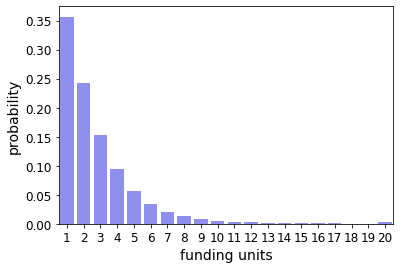

In [10]:
sns.barplot(x=np.arange(1,21,1), y=bin_count_norm, color="blue", alpha=0.5)
plt.tick_params(labelsize=12)
plt.xlabel("funding units", fontsize=14)
plt.ylabel("probability", fontsize=14)

In [8]:
cntry_out = pubs_author_funder['funder_country'].explode().reset_index()
cntry_out = cntry_out.groupby("funder_country").size().reset_index()
cntry_out.columns=['funder_country','funding_units_out']
cntry_out.head()

,funder_country,funding_units_out
0,Afghanistan,23
1,Albania,34
2,Algeria,2607
3,Andorra,53
4,Angola,76


In [8]:
explodelist = []
for index, row in pubs_author_funder.iterrows():
    units = row['funding_units']
    author_country = row['author_country']
    for item in author_country:
        templist = [item, units/len(author_country)]
        explodelist.append(templist)

In [9]:
cntry_in = pd.DataFrame(explodelist, columns=['author_country','funding_units_in'])
cntry_in.head()

,author_country,funding_units_in
0,Turkey,1.0
1,United States,2.0
2,France,2.0
3,Russia,1.0
4,Spain,3.0


In [10]:
cntry_in = cntry_in.groupby("author_country")['funding_units_in'].sum().reset_index()

In [11]:
cntry_out.shape

(191, 2)

In [12]:
cntry_in_out = cntry_in.merge(cntry_out, left_on='author_country', right_on="funder_country", how="inner")
cntry_in_out.head()

,author_country,funding_units_in,funder_country,funding_units_out
0,Afghanistan,95.035440,Afghanistan,23
1,Albania,207.108642,Albania,34
2,Algeria,4864.172289,Algeria,2607
3,Andorra,25.181734,Andorra,53
4,Angola,204.422412,Angola,76


In [13]:
cntry_in_out.sort_values(by='funding_units_out',ascending=False)

,author_country,funding_units_in,funder_country,funding_units_out
35,China,5.791811e+06,China,6175841
180,United States,4.794112e+06,United States,4962957
84,Japan,8.571260e+05,Japan,845915
179,United Kingdom,9.116550e+05,United Kingdom,793160
62,Germany,8.629972e+05,Germany,745602
...,...,...,...,...
107,Mauritania,8.414417e+01,Mauritania,3
168,Tajikistan,1.915572e+02,Tajikistan,3
184,Vatican,1.444274e+02,Vatican,3
33,Chad,1.032298e+02,Chad,3


Text(0, 0.5, 'recieve funding units')

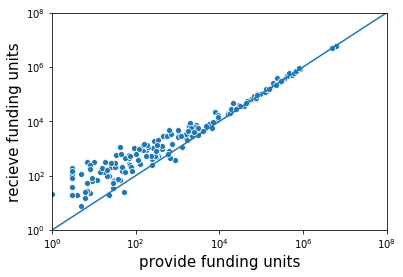

In [17]:
f, ax = plt.subplots()
ax.set(xscale="log", yscale="log")
sns.scatterplot(x="funding_units_out", y="funding_units_in", data=cntry_in_out, ax=ax)
sns.lineplot(x=[1,10**8],y=[1,10**8], ax=ax)
plt.xlim([1,10**8])
plt.ylim([1,10**8])
plt.xlabel("provide funding units", fontsize=15)
plt.ylabel('recieve funding units', fontsize=15)

In [18]:
pubs_author_funder.head()

,id,author_country,funder_country,funding_units
0,30507292,[Turkey],[Turkey],1
1,30574690,"[United States, France]","[United States, United States, United States, ...",4
2,30574691,[Russia],[Russia],1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",6
4,30585097,"[Germany, Spain]",[Spain],1


In [109]:
testlist=[['p1',['c1','c2','c2'],['c1'],1],
         ['p2',['c1','c2','c3'],['c2','c2','c3'],3]]
test_df = pd.DataFrame(testlist, columns=['id','author_country','funder_country','funding_units'])
test_df

,id,author_country,funder_country,funding_units
0,p1,"[c1, c2, c2]",[c1],1
1,p2,"[c1, c2, c3]","[c2, c2, c3]",3


In [9]:
from itertools import product

In [13]:
cntry_cntry_flow = []
for index, row in pubs_author_funder.iterrows():
    author_country = row['author_country']
    funding_country=row['funder_country']
    num_author=len(author_country)
    for funder,author in product(funding_country,author_country):
        credit = 1/(num_author)
        templist = [funder,author, credit]
        cntry_cntry_flow.append(templist)

In [14]:
cntry_cntry_df = pd.DataFrame(cntry_cntry_flow, columns=['source','target','value'])
cntry_cntry_df = cntry_cntry_df.groupby(['source','target'])['value'].sum().reset_index()
cntry_cntry_df

,source,target,value
0,Afghanistan,Afghanistan,0.500000
1,Afghanistan,Australia,0.333333
2,Afghanistan,Bangladesh,0.666667
3,Afghanistan,Bolivia,0.125000
4,Afghanistan,Canada,1.132576
...,...,...,...
14144,Zimbabwe,United Kingdom,9.802381
14145,Zimbabwe,United States,23.297150
14146,Zimbabwe,Vietnam,0.500000
14147,Zimbabwe,Zambia,2.242857


In [15]:
cntry_cntry_df.to_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv", index=False)

In [19]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df.head()

,source,target,value
0,Afghanistan,Afghanistan,0.500000
1,Afghanistan,Australia,0.333333
2,Afghanistan,Bangladesh,0.666667
3,Afghanistan,Bolivia,0.125000
4,Afghanistan,Canada,1.132576


In [16]:
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [18]:
cntrylist = list(set(cntry_cntry_df.index) & set(cntry_cntry_df.columns)) 

In [19]:
cntry_cntry_normed = cntry_cntry_df.div(cntry_cntry_df.sum(axis=1), axis=0)
cntry_cntry_normed = cntry_cntry_normed.loc[cntrylist, cntrylist]
cntry_cntry_normed.head()

target,Andorra,Byelarus,Malta,Algeria,Estonia,China,Liechtenstein,French-Polynesia,Republic of Serbia,Palau,...,Norway,Bolivia,Canada,Guinea,New-Caledonia,United States,Central African Republic,Qatar,Bahamas,Djibouti
source,,,,,,,,,,,,,,,,,,,,,
Andorra,0.066038,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.015723,0.000000,0.000000,0.000000,0.000000,0.073585,0.0,0.000000,0.0,0.0
Byelarus,0.000000,0.365256,0.000000,0.000003,0.001035,0.014391,0.0,0.0,0.002765,0.0,...,0.004009,0.000000,0.013242,0.000000,0.000000,0.078286,0.0,0.000034,0.0,0.0
Malta,0.000000,0.000000,0.428988,0.004225,0.000782,0.002660,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.003912,0.000000,0.000000,0.037366,0.0,0.000000,0.0,0.0
Algeria,0.000000,0.000224,0.000000,0.654523,0.000008,0.002100,0.0,0.0,0.001151,0.0,...,0.000416,0.000000,0.005709,0.000000,0.000128,0.008415,0.0,0.000000,0.0,0.0
Estonia,0.000000,0.001431,0.000030,0.000047,0.622993,0.006598,0.0,0.0,0.001090,0.0,...,0.005398,0.000036,0.005503,0.000006,0.000000,0.048025,0.0,0.000322,0.0,0.0


In [23]:
selffunding = pd.DataFrame(
    np.diag(cntry_cntry_normed), index=[cntry_cntry_normed.index,cntry_cntry_normed.columns]).reset_index()
selffunding.columns=['source','target','ratio']

In [24]:
selffunding.head()

,source,target,ratio
0,Liberia,Liberia,0.111938
1,Togo,Togo,0.500000
2,Zambia,Zambia,0.406228
3,Azerbaijan,Azerbaijan,0.185055
4,Bhutan,Bhutan,0.273257


Text(0, 0.5, 'Self Funding Ratio')

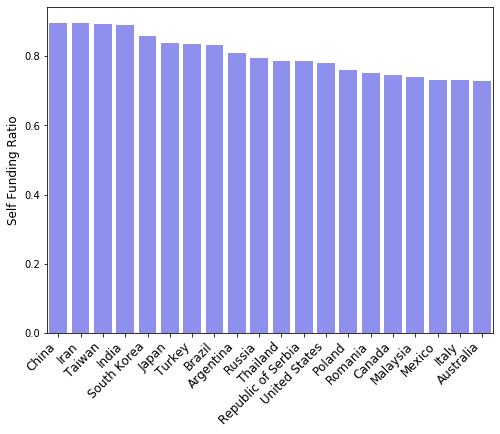

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ratio = selffunding.sort_values(by='ratio', ascending=False).head(20)['ratio'].values
xlabels = selffunding.sort_values(by='ratio', ascending=False).head(20)['source'].tolist()
sns.barplot(x = np.arange(0,20,1),y = ratio, color="blue", alpha=0.5)
plt.xticks(np.arange(0,20,1),xlabels,rotation=45, fontsize=12,ha="right")
plt.ylabel("Self Funding Ratio", fontsize=12)


In [26]:
top20 = cntry_in_out.sort_values(by='funding_units_out',ascending=False).head(20).author_country
top20

35              China
180     United States
84              Japan
179    United Kingdom
62            Germany
158             Spain
31             Canada
156       South Korea
22             Brazil
56             France
7           Australia
75              India
142            Russia
167            Taiwan
164            Sweden
81              Italy
165       Switzerland
118       Netherlands
14            Belgium
136          Portugal
Name: author_country, dtype: object

In [35]:
valuelist=[]
labellist=[]
for cntry in top20:
    value = top20_self[top20_self.source==cntry]['ratio'].values[0]
    valuelist.append(value)
    labellist.append(cntry)

Text(0, 0.5, 'Self Funding Ratio')

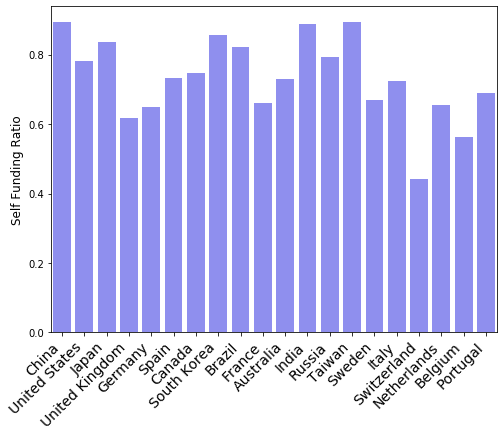

In [39]:

top20_self = selffunding[selffunding.source.isin(top20)]
fig, ax = plt.subplots(figsize=(8,6))
ratio = top20_self['ratio'].values
xlabels = top20_self['source'].tolist()
sns.barplot(x = np.arange(0,20,1),y = valuelist, color="blue", alpha=0.5)
plt.xticks(np.arange(0,20,1),labellist,rotation=45, fontsize=14,ha="right")
plt.ylabel("Self Funding Ratio", fontsize=12)


In [21]:
import copy

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


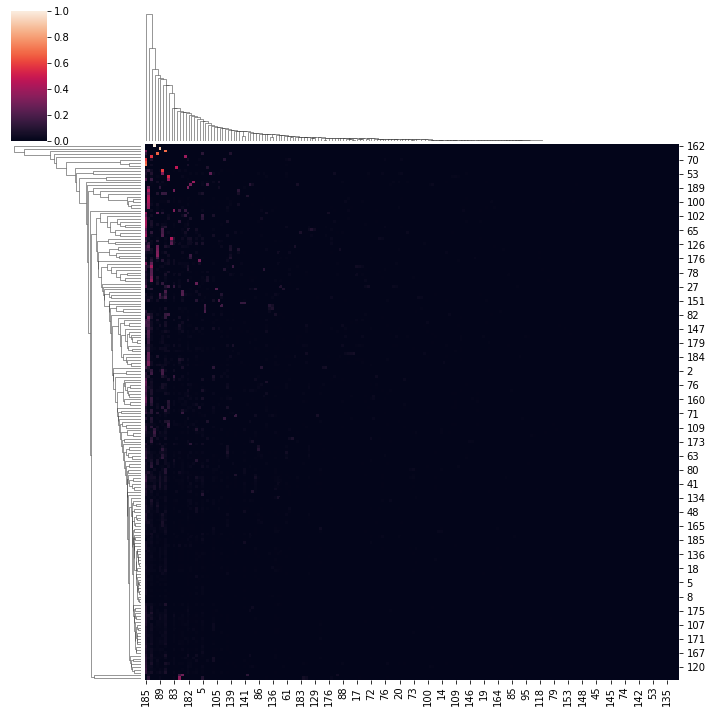

In [24]:
cntry_copied=copy.deepcopy(cntry_cntry_normed)
np.fill_diagonal(cntry_copied.values,0)
sns.clustermap(cntry_copied.values)

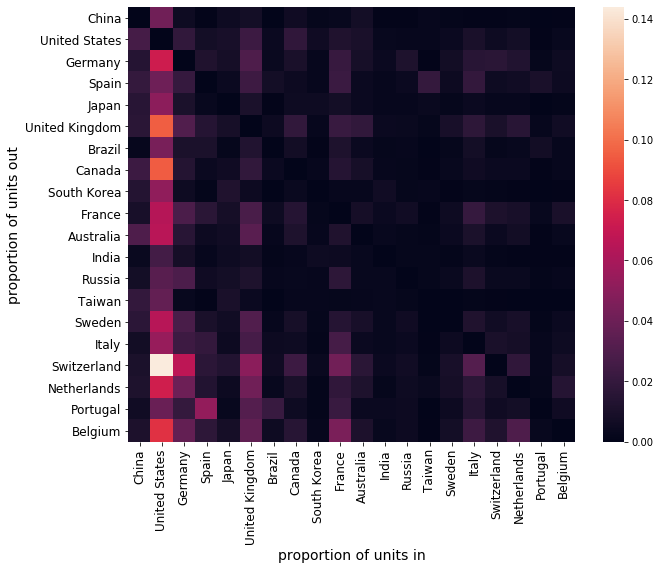

In [25]:
np.fill_diagonal(cntry_cntry_normed.values,0)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cntry_cntry_normed.loc[top20,top20])
plt.ylabel("proportion of units out", fontsize=14)
plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)

In [39]:
cntry_cntry_normed.loc[top20,top20].head()

target,China,United States,United Kingdom,Japan,Germany,Canada,Spain,South Korea,Brazil,France,Australia,India,Sweden,Russia,Italy,Switzerland,Taiwan,Netherlands,Belgium,Denmark
source,,,,,,,,,,,,,,,,,,,,
China,0.000000,0.041236,0.008255,0.005540,0.005433,0.005988,0.001127,0.002494,0.000339,0.003352,0.008077,0.000734,0.001679,0.001001,0.001252,0.000761,0.003094,0.001556,0.000853,0.000823
United States,0.026038,0.000000,0.024876,0.009517,0.020439,0.019497,0.008377,0.005843,0.004685,0.013485,0.010500,0.003550,0.004579,0.002798,0.010780,0.005902,0.002462,0.008247,0.003229,0.003464
United Kingdom,0.016147,0.096426,0.000000,0.008926,0.030485,0.019483,0.014332,0.002600,0.004605,0.021985,0.019181,0.004455,0.009635,0.003591,0.017422,0.009709,0.001890,0.015501,0.006461,0.006387
Japan,0.016439,0.056044,0.011151,0.000000,0.011036,0.006039,0.003294,0.005605,0.001036,0.007804,0.004308,0.002637,0.002070,0.002462,0.004910,0.002666,0.003678,0.002734,0.001622,0.001226
Germany,0.016366,0.079639,0.032613,0.008820,0.000000,0.011275,0.013915,0.002970,0.004442,0.023064,0.009498,0.004785,0.007593,0.011882,0.018341,0.016713,0.001053,0.013834,0.005894,0.005396


In [41]:
from itertools import permutations


In [66]:
ratio_df = pd.DataFrame(index=top20, columns=top20)
for s, t in permutations(top20,2):
    prv = cntry_cntry_df.loc[s,t]
    rec = cntry_cntry_df.loc[t,s]
    benefit = rec/prv
    ratio_df.loc[s,t]=benefit
ratio_df.head()

author_country,China,United States,United Kingdom,Japan,Germany,Canada,Spain,South Korea,Brazil,France,Australia,India,Sweden,Russia,Italy,Switzerland,Taiwan,Netherlands,Belgium,Denmark
author_country,,,,,,,,,,,,,,,,,,,,
China,NaN,0.550713,0.319406,0.446594,0.43302,0.507113,1.54954,0.672525,0.968064,0.282802,0.299286,0.357248,0.594771,0.450628,0.295427,0.657144,0.305137,0.288838,0.415417,0.505324
United States,1.81583,NaN,0.725768,1.01625,0.642179,0.766219,0.728911,1.23934,1.1479,0.574866,0.583134,0.621811,0.962509,0.808844,0.290293,1.35856,0.815444,0.397895,1.01881,0.854491
United Kingdom,3.13081,1.37785,NaN,1.1515,0.941691,0.822079,1.34708,1.43404,1.89685,0.805093,0.880106,0.708521,1.15304,1.13549,0.47041,1.52494,0.676066,0.630558,1.17458,1.08936
Japan,2.23917,0.98401,0.86843,NaN,0.763297,0.857357,1.12068,1.65867,1.33292,0.7156,0.864353,0.969146,1.2741,1.14515,0.351469,1.58221,0.827287,0.461996,1.10615,1.19226
Germany,2.30936,1.5572,1.06192,1.31011,NaN,1.14927,1.3714,1.46642,1.82327,0.869551,0.938205,0.851958,1.51768,0.95588,0.456026,1.33465,0.965405,0.780504,1.47825,1.32494


In [67]:
np.fill_diagonal(ratio_df.values, 1)
ratio_df = ratio_df.astype(float)

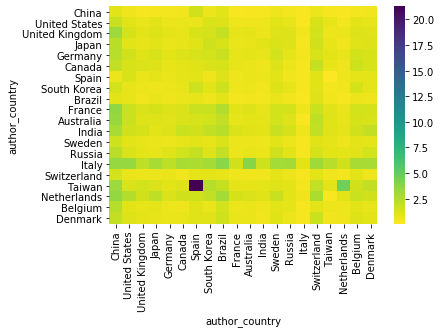

In [51]:
sns.heatmap(ratio_df,cmap="viridis_r")

In [85]:
cntry_cntry_normed.head()

target,Trinidad and Tobago,Papua New Guinea,Fiji,Nicaragua,Cuba,Vatican,Haiti,Egypt,Burkina Faso,Guadeloupe,...,France,North Korea,Bangladesh,Turkey,Ireland,Nigeria,Djibouti,Bolivia,Uruguay,Sierra Leone
source,,,,,,,,,,,,,,,,,,,,,
Trinidad and Tobago,0.0,0.0,0.0,0.0,0.0,0.0,0.000394,0.000000,0.000000,0.010101,...,0.008330,0.0,0.000000,0.000000,0.000000,0.003247,0.0,0.0,0.000000,0.0
Papua New Guinea,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.028865,0.0,0.002740,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Fiji,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.002976,0.0,0.002976,0.002551,0.000000,0.000000,0.0,0.0,0.000000,0.0
Nicaragua,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.074074,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Cuba,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000064,0.000451,0.000000,...,0.034105,0.0,0.000903,0.001673,0.000636,0.009477,0.0,0.0,0.000669,0.0


In [ ]:
cntry

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


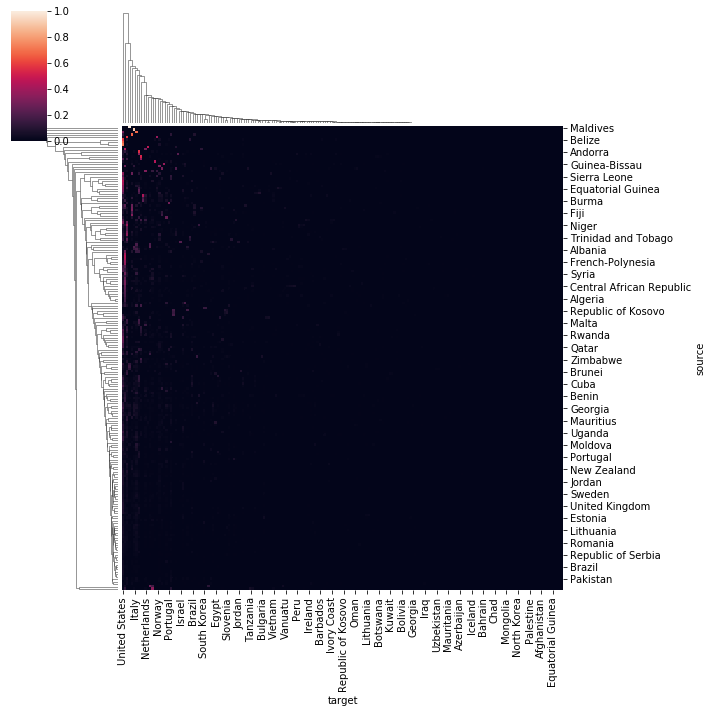

In [83]:
sns.clustermap(cntry_cntry_normed)

([<matplotlib.axis.YTick at 0x7f7f22ce9130>,
 <a list of 20 Text yticklabel objects>)

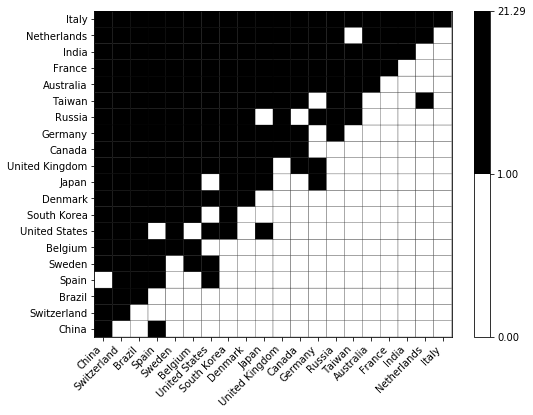

In [78]:
from matplotlib import colors
fig, ax=plt.subplots(figsize=(8,6))
cmap = colors.ListedColormap(['white','black'])
upperbounds=ratio_df.max().max()
bounds=[0, 1, upperbounds]
norm = colors.BoundaryNorm(bounds, cmap.N)
heatmap = plt.pcolor(np.array(test), cmap=cmap,norm=norm,edgecolors='black')
plt.colorbar(heatmap)
plt.xticks(np.arange(0,20,1)+0.5,test.index.tolist(),rotation=45, fontsize=10,ha="right")
plt.yticks(np.arange(0,20,1)+0.5,test.index.tolist(),fontsize=10)
#plt.ylabel("Countries",fontsize=15)
#plt.xlabel("Disciplines",fontsize=15)
#

In [73]:
def order_rca_matrix(rca_df, ascending_flag_dis=False, ascending_flag_cntry=True):
    """ rearrange the rca matrix for nestedness

    input:
        rca_df: RCA values for each country (row) and each discipline (column)

    returns:
        order_rca_df: disciplines and countries are ordered in descending order
                      in terms of the number of RCA>1 disciplines and the number
                      of RCA>1 countries respectively.

    """

    # sorting the columns (disciplines)
    num_highrca_cntry_per_dis = rca_df.gt(1.0).sum(axis=0)
    sorted_dis_list = list(
        num_highrca_cntry_per_dis.sort_values(ascending=ascending_flag_dis).index
    )
    ordered_rca_df = rca_df[sorted_dis_list]

    # sorting the rows (countries)
    num_highrca_dis_per_cntry = rca_df.gt(1.0).sum(axis=1)
    sorted_cntry_list = list(
        num_highrca_dis_per_cntry.sort_values(ascending=ascending_flag_cntry).index
    )
    ordered_rca_df = ordered_rca_df.reindex(sorted_cntry_list)

    return ordered_rca_df

In [75]:
test = order_rca_matrix(ratio_df)

In [1]:
from tqdm import tqdm

In [2]:
import pandas as pd

In [6]:
a=[['1',['a','b','c'],['m']],
  ['2',['a','b'],['m']],
  ['1',['3','4'],['m']],
  ['2',['5','6'],['m']]]
a_df=pd.DataFrame(a, columns=['id','cntrylist','label'])
a_df

,id,cntrylist,label
0,1,"[a, b, c]",[m]
1,2,"[a, b]",[m]
2,1,"[3, 4]",[m]
3,2,"[5, 6]",[m]


In [5]:
tqdm.pandas()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [12]:
a_df.groupby('id')['cntrylist'].sum().reset_index()

,id,cntrylist
0,1,"[a, b, c, 3, 4]"
1,2,"[a, b, 5, 6]"
